***Building a deep learning model to classify handwritten digits using the MNIST dataset***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Step 1 :  Load the MNIST dataset.

In [5]:
from tensorflow.keras.datasets import mnist

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


# Step 2 : Preprocessing.

## Normalized the pixel values.

In [8]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

## Flatten images (28x28)

In [9]:
x_train = x_train.reshape((x_train.shape[0], 28*28))
x_test = x_test.reshape((x_test.shape[0], 28*28))


## See the shape of the train-test

In [11]:
print("Training data shape:", x_train.shape)
print("Training data type:", x_train.dtype)
print("\nTesting data shape:", x_test.shape)
print("Testing data type:", x_test.dtype)



Training data shape: (60000, 784)
Training data type: float32

Testing data shape: (10000, 784)
Testing data type: float32


## Understand the data

In [15]:
train_df = pd.DataFrame(x_train)
test_df = pd.DataFrame(x_test)

print("\nTraining data description:")
print(train_df.describe())

print("\nTesting data description:")
print(test_df.describe())


Training data description:
           0        1        2        3        4        5        6        7    \
count  60000.0  60000.0  60000.0  60000.0  60000.0  60000.0  60000.0  60000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

           8        9    ...           774           775           776  \
count  60000.0  60000.0  ...  60000.000000  60000.000000  60000.000000   
mean       0.0      0.0  ...      0.000786      0.000348      0.000179   
std        0.0      

##  One-hot encode labels

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)

# Step 3 : Model Architecture

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

In [22]:
model = Sequential([
    Dense(512, activation="relu", input_shape=(784,)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, activation="relu"),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation="relu"),
    Dropout(0.2),

    Dense(10, activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Step 4 : Compile & Train

In [31]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

# Train with validation split
history = model.fit(
    x_train, y_train_one_hot,
    validation_split=0.2,
    epochs=15,
    batch_size=128,
    verbose=2
)

Epoch 1/15
375/375 - 9s - 24ms/step - accuracy: 0.8976 - loss: 0.3351 - val_accuracy: 0.9608 - val_loss: 0.1289
Epoch 2/15
375/375 - 6s - 16ms/step - accuracy: 0.9518 - loss: 0.1592 - val_accuracy: 0.9712 - val_loss: 0.1005
Epoch 3/15
375/375 - 6s - 17ms/step - accuracy: 0.9633 - loss: 0.1222 - val_accuracy: 0.9703 - val_loss: 0.0935
Epoch 4/15
375/375 - 6s - 16ms/step - accuracy: 0.9690 - loss: 0.1006 - val_accuracy: 0.9746 - val_loss: 0.0823
Epoch 5/15
375/375 - 11s - 29ms/step - accuracy: 0.9720 - loss: 0.0899 - val_accuracy: 0.9757 - val_loss: 0.0811
Epoch 6/15
375/375 - 10s - 27ms/step - accuracy: 0.9750 - loss: 0.0779 - val_accuracy: 0.9772 - val_loss: 0.0836
Epoch 7/15
375/375 - 9s - 25ms/step - accuracy: 0.9771 - loss: 0.0720 - val_accuracy: 0.9778 - val_loss: 0.0774
Epoch 8/15
375/375 - 10s - 27ms/step - accuracy: 0.9794 - loss: 0.0629 - val_accuracy: 0.9798 - val_loss: 0.0695
Epoch 9/15
375/375 - 10s - 28ms/step - accuracy: 0.9806 - loss: 0.0608 - val_accuracy: 0.9778 - val_l

# Step 5 : Visualization

## plot Accuracy

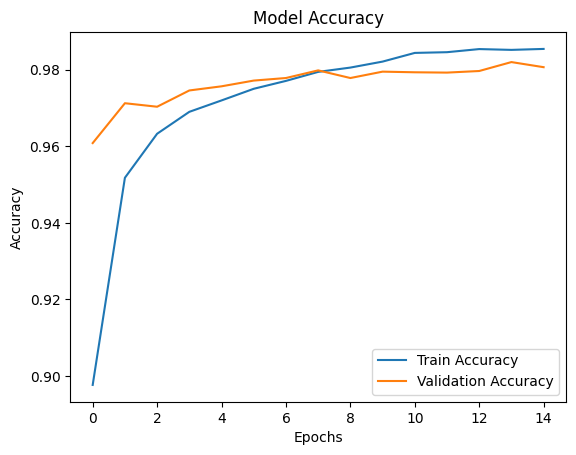

In [32]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The loss plot shows how much error the model made during training on both the training and validation data. We want to see both lines decreasing, indicating that the model is improving its predictions over time.

## Plot Loss

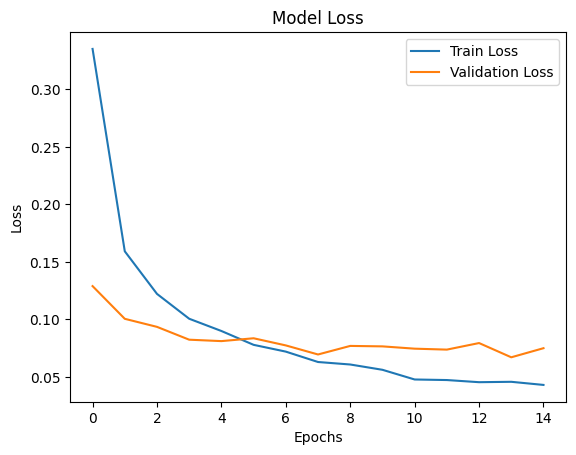

In [33]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

The loss plot shows how much error the model made during training on both the training and validation data. We want to see both lines decreasing, indicating that the model is improving its predictions over time.

# Step 6 : Evaluations

In [36]:
test_loss, test_acc = model.evaluate(x_test, y_test_one_hot, verbose=0)
print("Test Accuracy:", test_acc * 100)

Test Accuracy: 98.00999760627747


The model achieved a test accuracy of approximately 98.01%. The training and validation plots show good learning progress with decreasing loss and increasing accuracy over epochs.